In [271]:
!pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Подключение библиотек

In [272]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris, load_wine
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import TSNE
from umap import UMAP 
from sklearn.cluster import KMeans

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import DBSCAN
from sklearn import metrics

%matplotlib inline
import seaborn as sns
sns.set_style("white")
sns.set_palette("bright")

# Загрузка наборов данных
**Рассматриываемые наборы данных:**<br>
Fisher's iris<br>
Parkinson's disease<br>
wine detection<br>

In [273]:
iris, iris_labels = load_iris (return_X_y=True, as_frame=False)
mall = pd.read_csv('./mall-custom/Mall_Customers.csv')
mall_customers = mall[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].loc[:,:].values[:,:]
wine, wine_labels = load_wine (return_X_y=True, as_frame=False)


datasets = [['Fisher iris', iris, iris_labels], ['mall customers', mall_customers, []], ['wine', wine, wine_labels]]
datasets_reduction = [['Fisher iris', iris, iris_labels], ['wine', wine, wine_labels]]

# Глава 1. Алгоритмы уменьшения размерности данных
**Рассматриваемые алгоритмы:**<br>
UMAP<br>
t-SNE<br>
PCA<br>
SVD

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


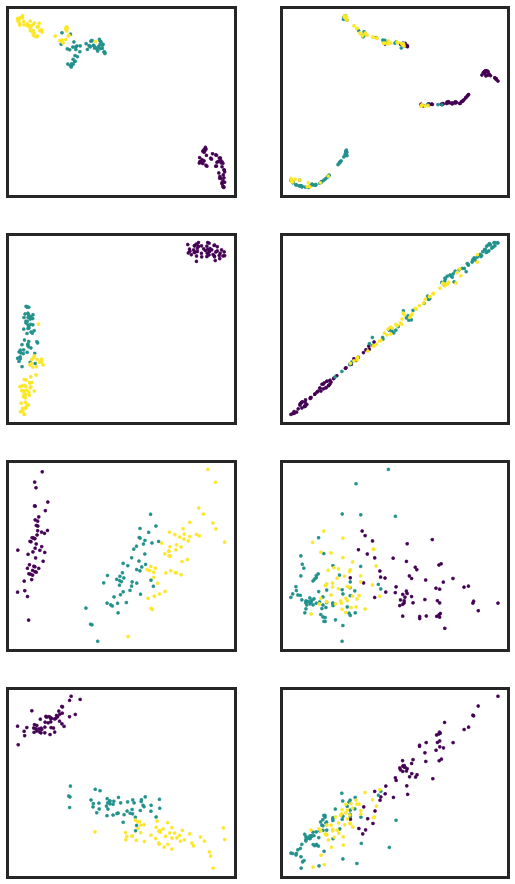

In [274]:
UMAP = UMAP()
t_SNE = TSNE()
PCA = PCA()
SVD = TruncatedSVD()
algorithms = [UMAP, t_SNE, PCA, SVD]

fig, ax_array = plt.subplots(4, 2, figsize=(8, 16))

for ax1, algorithm in enumerate(algorithms):
    for ax2, (name, dataset, true_labels) in enumerate(datasets_reduction):     
        embeddings = algorithm.fit_transform(dataset)
        ax_array[ax1, ax2].scatter(embeddings[:, 0], embeddings[:, 1], c=true_labels.astype(int), cmap = "viridis", marker = '.')
        ax_array[ax1, ax2].set_xticks([])
        ax_array[ax1, ax2].set_yticks([])

# Глава 2. Машинное обучение без учителя
## 2.1 Иеррархические методы кластеризации
**Рассматриваемые методы** сверху вниз:<br>
Метод одиночной связи<br>
Метод полной связи<br>
Метод средней связи<br>
Центроидный метод<br>
Метод Уорда<br><br>
Наборы данных слева направо:<br>
Fisher's iris<br>
Mall customers<br>
Wines<br>

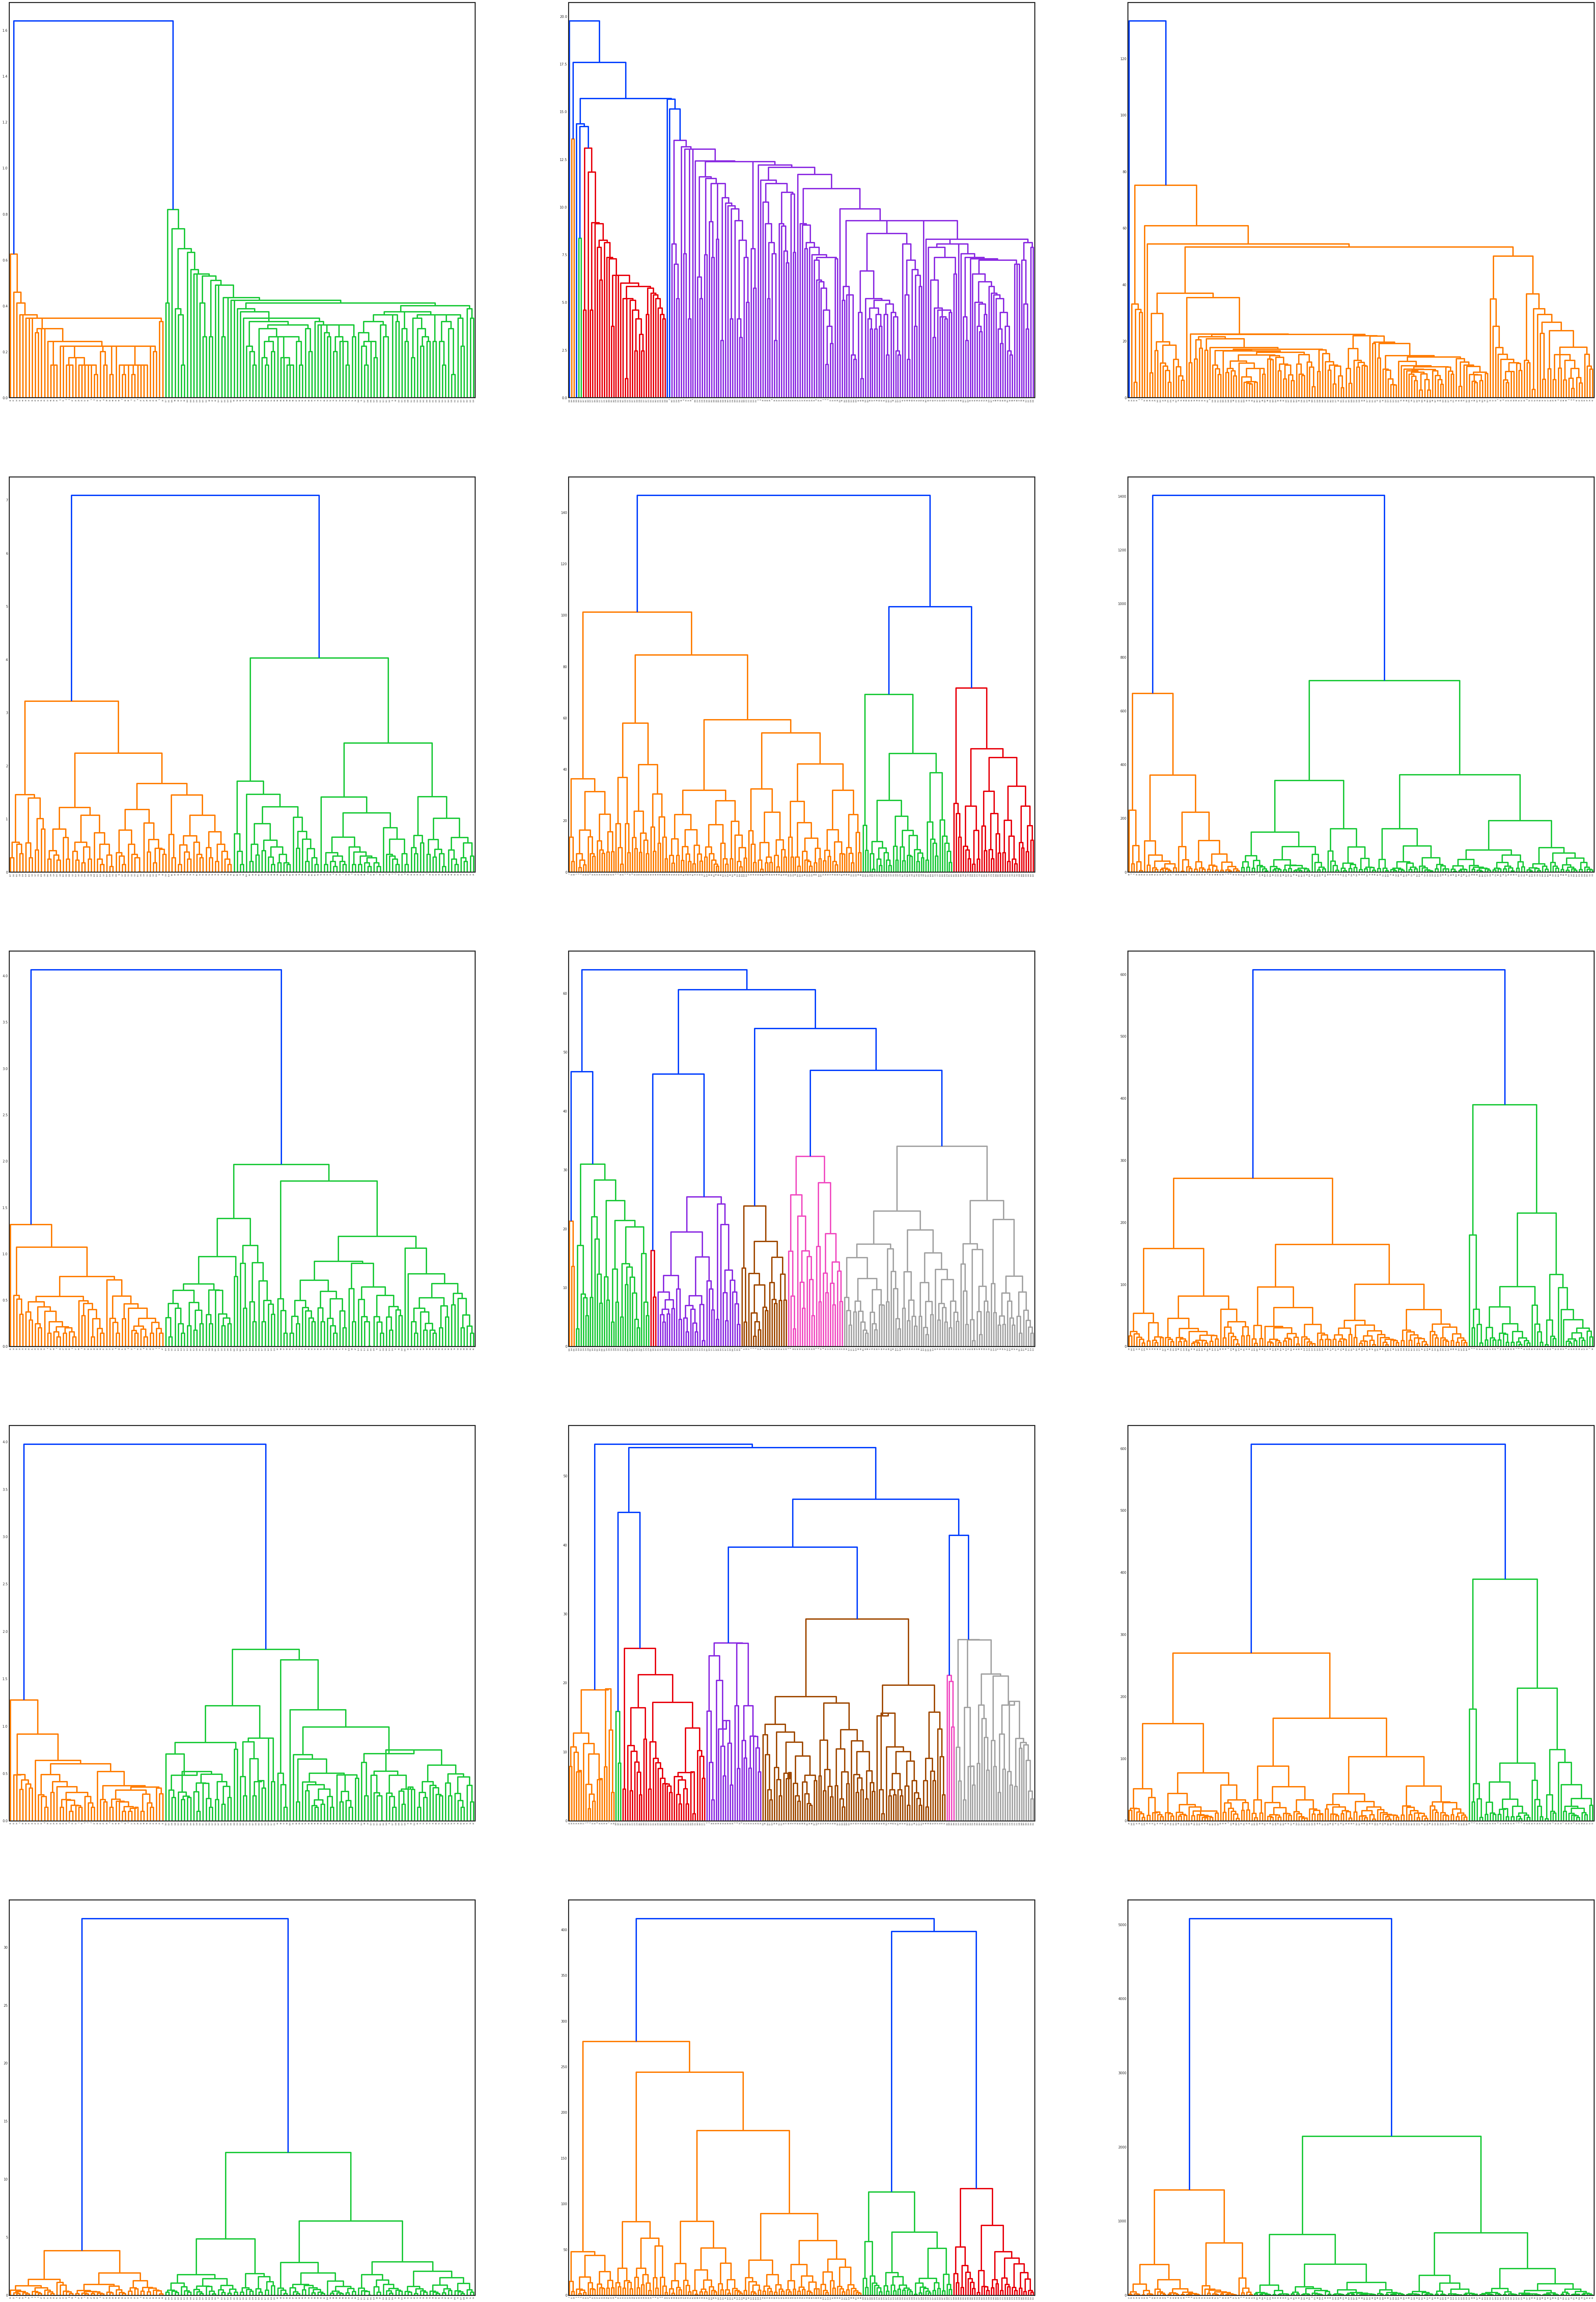

In [275]:
algorithms = ["single", "complete", "average", "centroid", "ward"]



plt.figure(1, figsize=(75, 125))
plt.clf()
num = 1
for ax1, algorithm in enumerate(algorithms):
    for ax2, (name, dataset, true_labels) in enumerate(datasets):     
        hier = linkage (dataset, algorithm)
        plt.subplot(5, 3, num)
        dendrogram(hier)
        num = num + 1

## 2.2 Другие методы кластеризации
**Рассматриваемый метод:**<br>
DBSCAN<br>
<br>
**Методы оценки качества кластеризации:**<br>
V-мера<br>
Коэффициент силуэта<br>


Estimations for  wine dataset
V-measure: 0.734
Silhouette Coefficient: 0.687


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


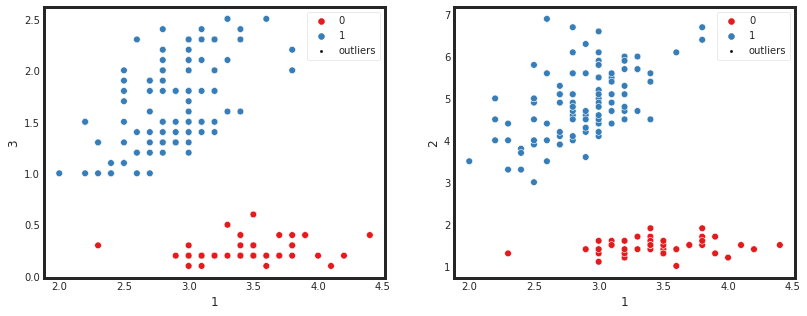

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


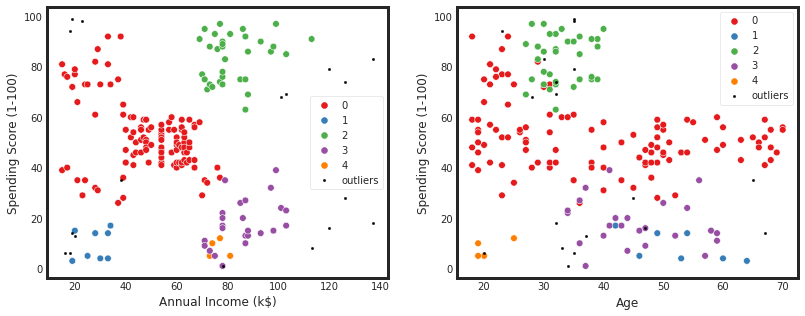

Estimations for  wine dataset
V-measure: 0.384
Silhouette Coefficient: 0.421


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-pack

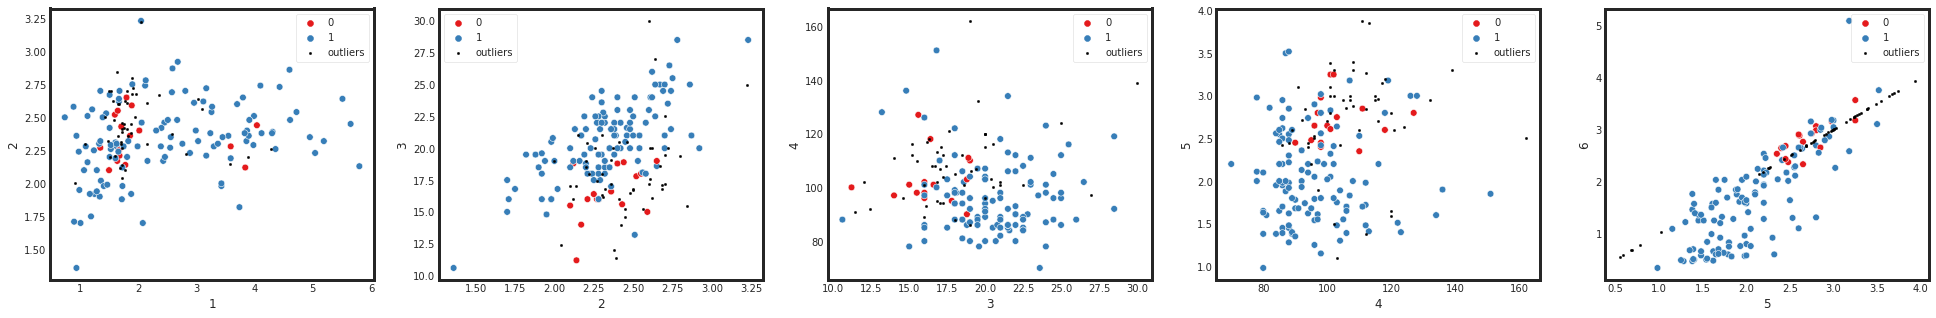

In [276]:
dataset = iris 
true_labels = iris_labels

iris_pd = pd.DataFrame(data = dataset)
DBS_clustering = DBSCAN(eps=1, min_samples=5).fit(iris_pd)
DBSCAN_clustered = iris_pd.copy()

db_labels = DBS_clustering.labels_
print("Estimations for ", name, "dataset")
print(f"V-measure: {metrics.v_measure_score(true_labels, db_labels):.3f}")
print(f"Silhouette Coefficient: {metrics.silhouette_score(dataset, db_labels):.3f}")

DBSCAN_clustered.loc[:,'Cluster'] = db_labels
outliers = DBSCAN_clustered[DBSCAN_clustered['Cluster']==-1]

fig1, (axes) = plt.subplots(1,2,figsize=(12,5))


sns.scatterplot(1, 3,
                data=DBSCAN_clustered[DBSCAN_clustered['Cluster']!=-1],
                hue='Cluster', ax=axes[0], palette='Set1', legend='full', s=45)

sns.scatterplot(1, 2,
                data=DBSCAN_clustered[DBSCAN_clustered['Cluster']!=-1],
                hue='Cluster', palette='Set1', ax=axes[1], legend='full', s=45)

axes[0].scatter(outliers[1], outliers[2], s=5, label='outliers', c="k")
axes[1].scatter(outliers[2], outliers[3], s=5, label='outliers', c="k")

axes[0].legend()
axes[1].legend()


plt.setp(axes[0].get_legend().get_texts(), fontsize='10')
plt.setp(axes[1].get_legend().get_texts(), fontsize='10')

plt.show()





mall_customers = pd.read_csv ("./mall-custom/Mall_Customers.csv")
X_numerics = mall_customers[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
DBS_clustering = DBSCAN(eps=12.5, min_samples=4).fit(X_numerics)
DBSCAN_clustered = X_numerics.copy()

DBSCAN_clustered.loc[:,'Cluster'] = DBS_clustering.labels_
outliers = DBSCAN_clustered[DBSCAN_clustered['Cluster']==-1]

fig2, (axes) = plt.subplots(1,2,figsize=(12,5))


sns.scatterplot('Annual Income (k$)', 'Spending Score (1-100)',
                data=DBSCAN_clustered[DBSCAN_clustered['Cluster']!=-1],
                hue='Cluster', ax=axes[0], palette='Set1', legend='full', s=45)

sns.scatterplot('Age', 'Spending Score (1-100)',
                data=DBSCAN_clustered[DBSCAN_clustered['Cluster']!=-1],
                hue='Cluster', palette='Set1', ax=axes[1], legend='full', s=45)


axes[0].scatter(outliers['Annual Income (k$)'], outliers['Spending Score (1-100)'], s=5, label='outliers', c="k")
axes[1].scatter(outliers['Age'], outliers['Spending Score (1-100)'], s=5, label='outliers', c="k")

axes[0].legend()
axes[1].legend()


plt.setp(axes[0].get_legend().get_texts(), fontsize='10')
plt.setp(axes[1].get_legend().get_texts(), fontsize='10')


plt.show()





dataset = wine 
true_labels = wine_labels


wine_pd = pd.DataFrame(data = dataset)
DBS_clustering = DBSCAN(eps=45, min_samples=13).fit(wine_pd)
DBSCAN_clustered = wine_pd.copy()

db_labels = DBS_clustering.labels_
print("Estimations for ", name, "dataset")
print(f"V-measure: {metrics.v_measure_score(true_labels, db_labels):.3f}")
print(f"Silhouette Coefficient: {metrics.silhouette_score(dataset, db_labels):.3f}")

DBSCAN_clustered.loc[:,'Cluster'] = db_labels
outliers = DBSCAN_clustered[DBSCAN_clustered['Cluster']==-1]

fig3, (axes) = plt.subplots(1,5,figsize=(30,5))



sns.scatterplot(1, 2,
                data=DBSCAN_clustered[DBSCAN_clustered['Cluster']!=-1],
                hue='Cluster', ax=axes[0], palette='Set1', legend='full', s=45)

sns.scatterplot(2, 3,
                data=DBSCAN_clustered[DBSCAN_clustered['Cluster']!=-1],
                hue='Cluster', palette='Set1', ax=axes[1], legend='full', s=45)
sns.scatterplot(3, 4,
                data=DBSCAN_clustered[DBSCAN_clustered['Cluster']!=-1],
                hue='Cluster', palette='Set1', ax=axes[2], legend='full', s=45)
sns.scatterplot(4, 5,
                data=DBSCAN_clustered[DBSCAN_clustered['Cluster']!=-1],
                hue='Cluster', palette='Set1', ax=axes[3], legend='full', s=45)
sns.scatterplot(5, 6,
                data=DBSCAN_clustered[DBSCAN_clustered['Cluster']!=-1],
                hue='Cluster', palette='Set1', ax=axes[4], legend='full', s=45)


axes[0].scatter(outliers[1], outliers[2], s=5, label='outliers', c="k")
axes[1].scatter(outliers[2], outliers[3], s=5, label='outliers', c="k")
axes[2].scatter(outliers[3], outliers[4], s=5, label='outliers', c="k")
axes[3].scatter(outliers[4], outliers[5], s=5, label='outliers', c="k")
axes[4].scatter(outliers[6], outliers[6], s=5, label='outliers', c="k")

axes[0].legend()
axes[1].legend()
axes[2].legend()
axes[3].legend()
axes[4].legend()


plt.setp(axes[0].get_legend().get_texts(), fontsize='10')
plt.setp(axes[1].get_legend().get_texts(), fontsize='10')
plt.setp(axes[2].get_legend().get_texts(), fontsize='10')
plt.setp(axes[3].get_legend().get_texts(), fontsize='10')
plt.setp(axes[4].get_legend().get_texts(), fontsize='10')




plt.show()


**Рассматриваемый метод:**<br>
Метод k-средних<br>
<br>
**Методы оценки качества кластеризации:**<br>
V-мера<br>
Коэффициент силуэта<br>


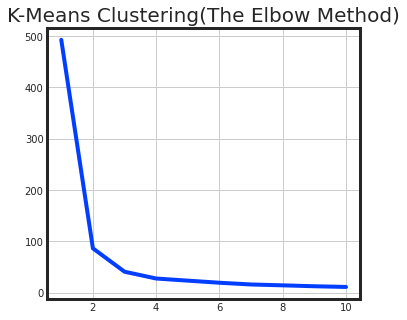

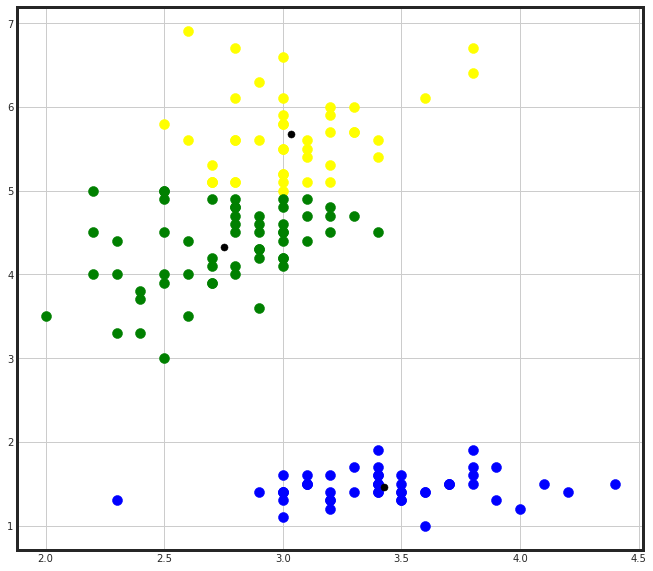

Estimations for  wine dataset
V-measure: 0.802
Silhouette Coefficient: 0.531


In [277]:
dataset = iris

df = pd.DataFrame(data = iris)
x = df.iloc[:,[1, 2]].values

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.rcParams['figure.figsize'] = (5, 5)
plt.plot(range(1, 11), wcss)
plt.title('K-Means Clustering(The Elbow Method)', fontsize = 20)
plt.grid()
plt.show()

kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
ymeans = kmeans.fit_predict(x)



plt.rcParams['figure.figsize'] = (10, 10)

plt.scatter(x[ymeans == 0, 0], x[ymeans == 0, 1], s = 100, c = 'blue')
plt.scatter(x[ymeans == 1, 0], x[ymeans == 1, 1], s = 100, c = 'yellow')
plt.scatter(x[ymeans == 2, 0], x[ymeans == 2, 1], s = 100, c = 'green')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'black')

plt.style.use('fivethirtyeight')
plt.grid()
plt.show()

true_labels = iris_labels
print("Estimations for ", name, "dataset")
print(f"V-measure: {metrics.v_measure_score(true_labels, ymeans):.3f}")
print(f"Silhouette Coefficient: {metrics.silhouette_score(dataset, ymeans):.3f}")

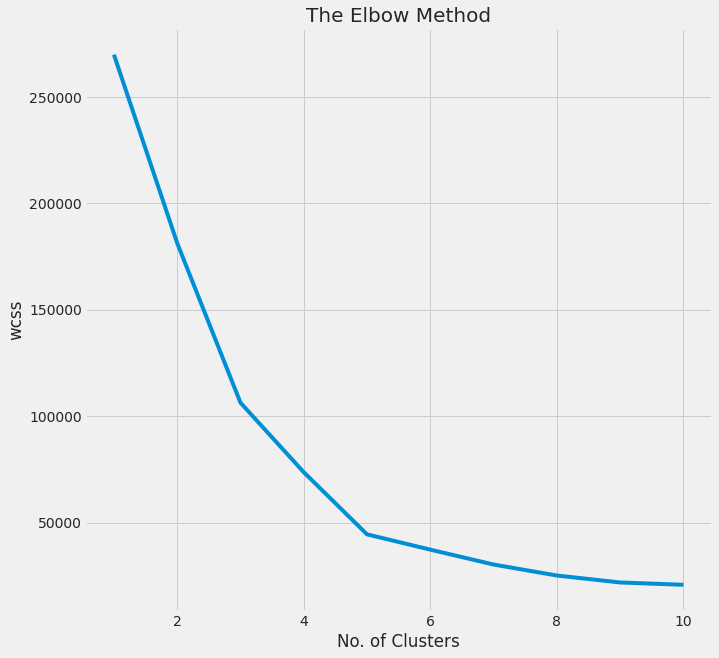

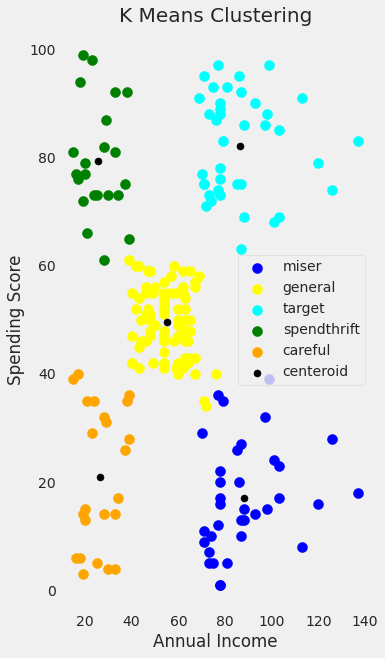

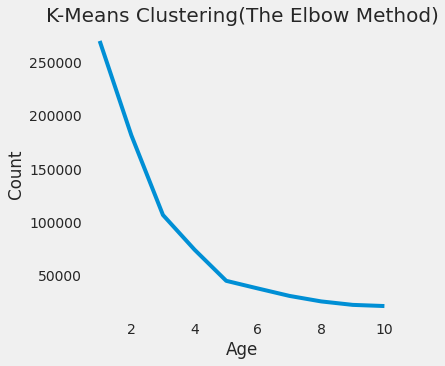

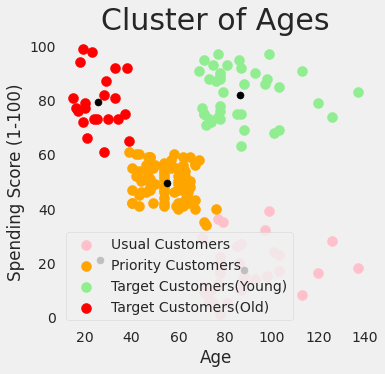

In [278]:
#Annual Income vs Spending score K-means
x = mall_customers.iloc[:, [3, 4]].values


from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.rcParams['figure.figsize'] = (5, 10)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'blue', label = 'miser')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'general')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'target')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'green', label = 'spendthrift')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'orange', label = 'careful')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'black' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (5, 5)
plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

# age K-means

from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.rcParams['figure.figsize'] = (5, 5)
plt.plot(range(1, 11), wcss)
plt.title('K-Means Clustering(The Elbow Method)', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid()
plt.show()

kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
ymeans = kmeans.fit_predict(x)

plt.rcParams['figure.figsize'] = (5, 5)
plt.title('Cluster of Ages', fontsize = 30)

plt.scatter(x[ymeans == 0, 0], x[ymeans == 0, 1], s = 100, c = 'pink', label = 'Usual Customers' )
plt.scatter(x[ymeans == 1, 0], x[ymeans == 1, 1], s = 100, c = 'orange', label = 'Priority Customers')
plt.scatter(x[ymeans == 2, 0], x[ymeans == 2, 1], s = 100, c = 'lightgreen', label = 'Target Customers(Young)')
plt.scatter(x[ymeans == 3, 0], x[ymeans == 3, 1], s = 100, c = 'red', label = 'Target Customers(Old)')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'black')

plt.style.use('fivethirtyeight')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid()
plt.show()

Estimations for  wine dataset
V-measure: 0.203
Silhouette Coefficient: -0.135


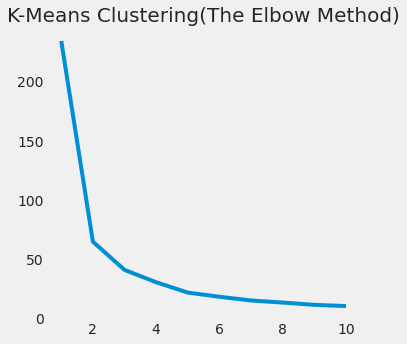

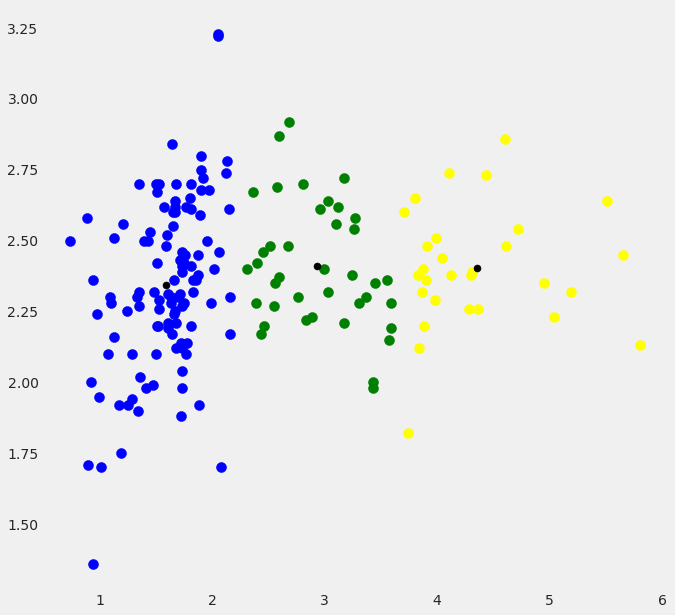

In [279]:
dataset = wine

df = pd.DataFrame(data = wine)
x = df.iloc[:,[1, 2]].values

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)


kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
ymeans = kmeans.fit_predict(x)


true_labels = wine_labels
print("Estimations for ", name, "dataset")
print(f"V-measure: {metrics.v_measure_score(true_labels, ymeans):.3f}")
print(f"Silhouette Coefficient: {metrics.silhouette_score(dataset, ymeans):.3f}")


plt.rcParams['figure.figsize'] = (5, 5)
plt.plot(range(1, 11), wcss)
plt.title('K-Means Clustering(The Elbow Method)', fontsize = 20)
plt.grid()
plt.show()





plt.rcParams['figure.figsize'] = (10, 10)

plt.scatter(x[ymeans == 0, 0], x[ymeans == 0, 1], s = 100, c = 'blue')
plt.scatter(x[ymeans == 1, 0], x[ymeans == 1, 1], s = 100, c = 'yellow')
plt.scatter(x[ymeans == 2, 0], x[ymeans == 2, 1], s = 100, c = 'green')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'black')

plt.style.use('fivethirtyeight')
plt.grid()
plt.show()

